## Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import pickle
import tensorflow as tf

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading Dataset

In [ ]:
df = pd.read_csv('/content/Reviews.csv')

## EDA(Exploratory Data Analysis)

### Dataset Information

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
df.shape

(568454, 10)

### Handling Missing Values

In [ ]:
# Fill missing profile names with a placeholder
df['ProfileName'] = df['ProfileName'].fillna('Unknown')
# Fill missing Summary values with empty string
df['Summary'] = df['Summary'].fillna('')

In [ ]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


### CORRELATION HEATMAP

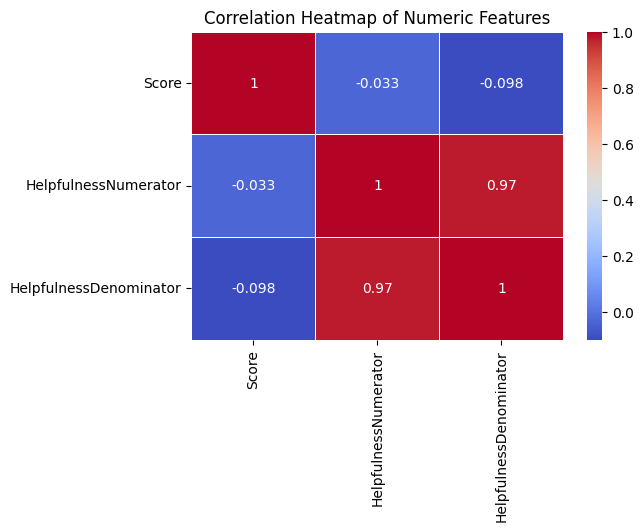

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']]

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Distribution of the Ratings Given by Customers

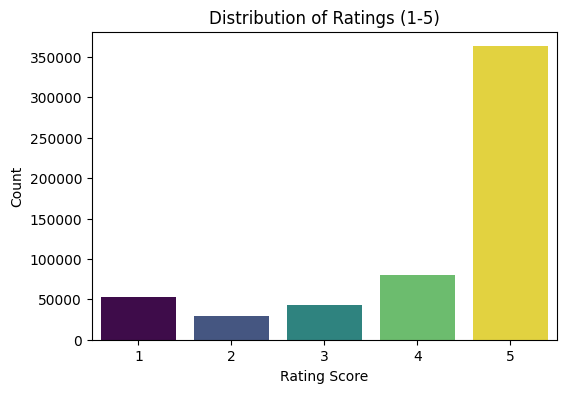

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Score', hue='Score', palette='viridis', legend=False)
plt.title('Distribution of Ratings (1-5)')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

## Create Sentiment column for Positive (1) / Negative (0) sentiment

In [ ]:
def label_sentiment(score):
    if score >= 4:
        return 1  # Positive
    elif score <= 2:
        return 0  # Negative
    else:
        return None  # Neutral

In [ ]:
# Apply the function to create Sentiment column
df['Sentiment'] = df['Score'].apply(label_sentiment)

In [ ]:
# Remove neutral reviews (where Sentiment is None)
df = df[df['Sentiment'].notnull()].reset_index(drop=True)

In [ ]:
# Verify the column was created
print(f"Sentiment column created! Shape: {df.shape}")
print(f"Sentiment distribution:\n{df['Sentiment'].value_counts()}")

Sentiment column created! Shape: (525814, 11)
Sentiment distribution:
Sentiment
1.0    443777
0.0     82037
Name: count, dtype: int64


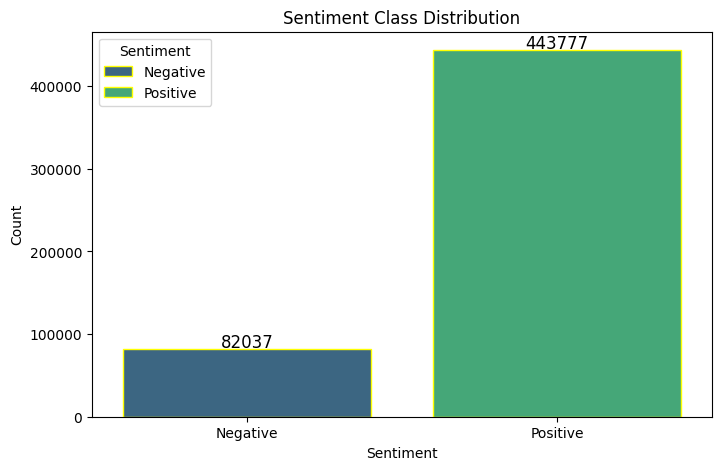

In [ ]:
# Create the count DataFrame
plot_df = df['Sentiment'].value_counts().reset_index()
plot_df.columns = ['Sentiment_value', 'Count']

# Replace numeric labels with names
sentiment_map = {0: 'Negative', 1: 'Positive'}
plot_df['Sentiment'] = plot_df['Sentiment_value'].map(sentiment_map)

# Sort to ensure correct order
plot_df = plot_df.sort_values('Sentiment')

plt.figure(figsize=(8, 5))

sns.barplot(
    data=plot_df,
    x='Sentiment',
    y='Count',
    hue='Sentiment',
    palette='viridis',
    legend=True,
    order=['Negative', 'Positive'],
    edgecolor='yellow'
)

plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for i, v in enumerate(plot_df['Count']):
    plt.text(i, v + 2000, str(v), ha='center', fontsize=12)

plt.show()

 ## Create Review column

In [ ]:
df['Summary'] = df['Summary'].fillna('')
df['Text'] = df['Text'].fillna('')
df['Review'] = df['Summary'] + " " + df['Text']

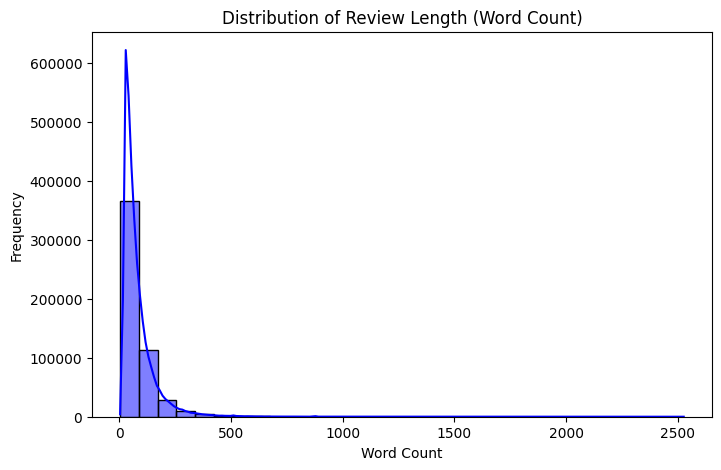

In [ ]:
# Review length distribution
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Review Length (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## Text Cleaning

In [ ]:
def clean_text(text):
    # Remove everything except letters
    text = re.sub(r"[^a-zA-Z]", " ", str(text))

    # Convert to lowercase
    text = text.lower().strip()

    return text

# Apply cleaning to Review column
df["CleanText"] = df["Review"].apply(clean_text)

# Show cleaned output
df["CleanText"].head()

,CleanText
0,good quality dog food i have bought several of...
1,not as advertised product arrived labeled as j...
2,delight says it all this is a confection that...
3,cough medicine if you are looking for the secr...
4,great taffy great taffy at a great price the...


### WordCloud for Positive Reviews

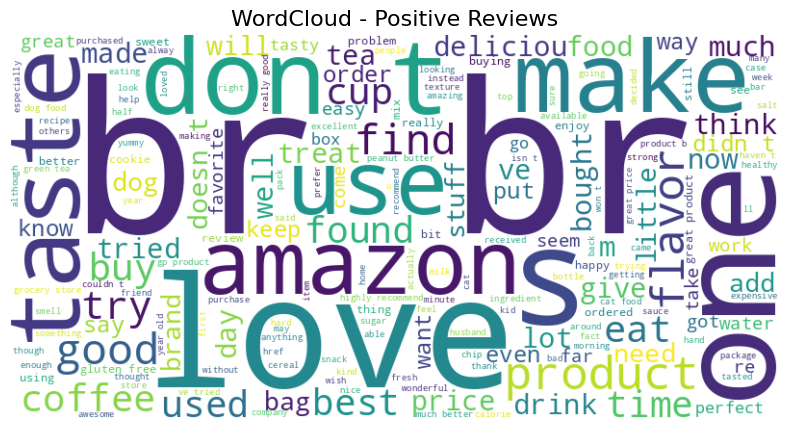

In [ ]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['Sentiment'] == 1]['CleanText'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Positive Reviews", fontsize=16)
plt.show()

### WordCloud for Negative Reviews

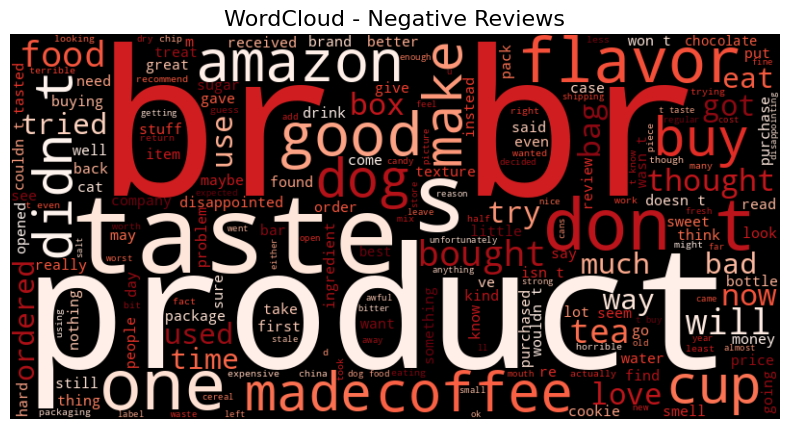

In [ ]:
negative_text = " ".join(df[df['Sentiment'] == 0]['CleanText'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Negative Reviews", fontsize=16)
plt.show()

### Comparison of Review Length Between Positive and Negative Sentiment

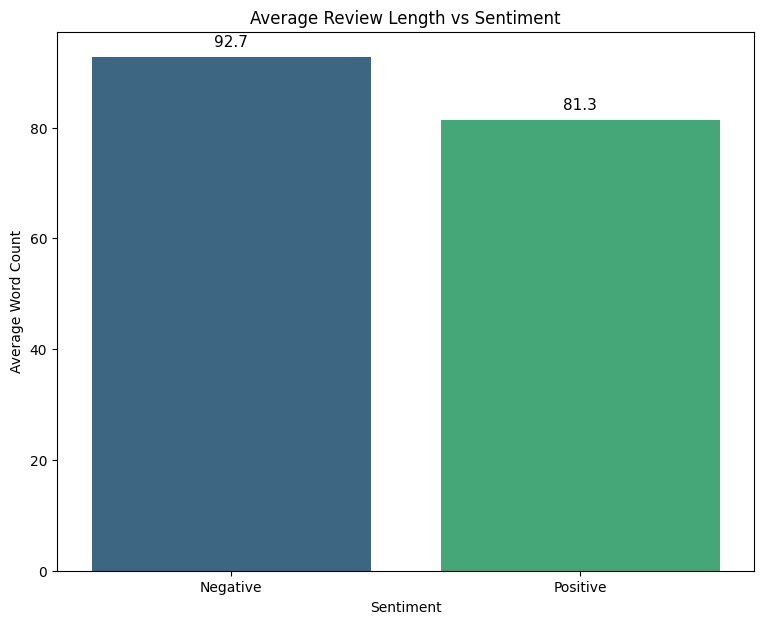

In [ ]:
# Calculate mean review length per sentiment
avg_length = df.groupby("Sentiment")["review_length"].mean().reset_index()

# Map numeric sentiment → labels
avg_length["Sentiment"] = avg_length["Sentiment"].map({0: "Negative", 1: "Positive"})

plt.figure(figsize=(9,7))

sns.barplot(
    data=avg_length,
    x="Sentiment",
    y="review_length",
    hue="Sentiment",
    palette="viridis",
    legend=False
)

plt.title("Average Review Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Word Count")

# Label values above each bar
for i, v in enumerate(avg_length["review_length"]):
    plt.text(i, v + 2, f"{v:.1f}", ha='center', fontsize=11)

plt.show()

### Top 20 Most Reviewed Products

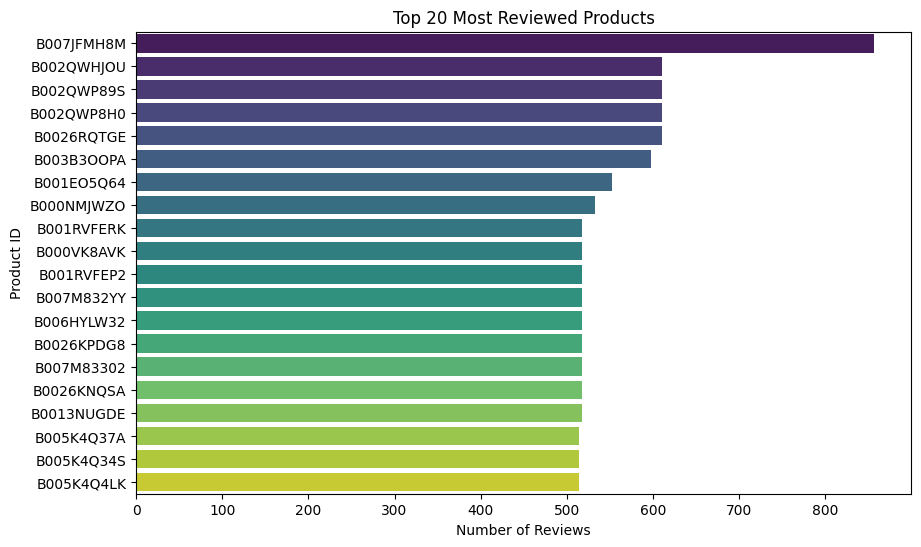

In [ ]:
top_products = df['ProductId'].value_counts().head(20).reset_index()
top_products.columns = ['ProductId', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_products,
    x='Count',
    y='ProductId',
    hue='ProductId',
    palette='viridis',
    legend=False
)

plt.title("Top 20 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product ID")

plt.show()

## TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df["CleanText"].values
y = df["Sentiment"].values

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),    # Unigrams + Bigrams
    stop_words='english'  # Faster + better accuracy
)

X = vectorizer.fit_transform(X)
X.shape

(525814, 5000)

## MODEL TRAINING && MODEL EVALUATION

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (420651, 5000)
Testing Shape: (105163, 5000)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_graphs(model_name, train_accuracy, test_accuracy, y_test, y_pred_test):

    # Accuracy Bar Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=['Training', 'Testing'],
        y=[train_accuracy, test_accuracy],
        hue=['Training', 'Testing'], palette='viridis', legend=False
    )
    plt.title(f'{model_name} - Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)

    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Negative', 'Positive'],
        yticklabels=['Negative', 'Positive']
    )
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression:
Learns the relationship between TF-IDF features (review words) and sentiment labels (Positive or Negative) by fitting a linear classifier.Predicts sentiment based on the probability of a review being positive or negative.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create the model
log_model = LogisticRegression(max_iter=4000)

# Train
log_model.fit(X_train, y_train)

# Predictions
y_pred_train_logreg = log_model.predict(X_train)
y_pred_test_logreg = log_model.predict(X_test)

# Accuracies
train_acc_logreg = accuracy_score(y_train, y_pred_train_logreg)
test_acc_logreg = accuracy_score(y_test, y_pred_test_logreg)

print(f"Training Accuracy: {train_acc_logreg:.4f}")
print(f"Testing Accuracy:  {test_acc_logreg:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_logreg))

Training Accuracy: 0.9476
Testing Accuracy:  0.9443

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81     16407
         1.0       0.96      0.98      0.97     88756

    accuracy                           0.94    105163
   macro avg       0.91      0.87      0.89    105163
weighted avg       0.94      0.94      0.94    105163



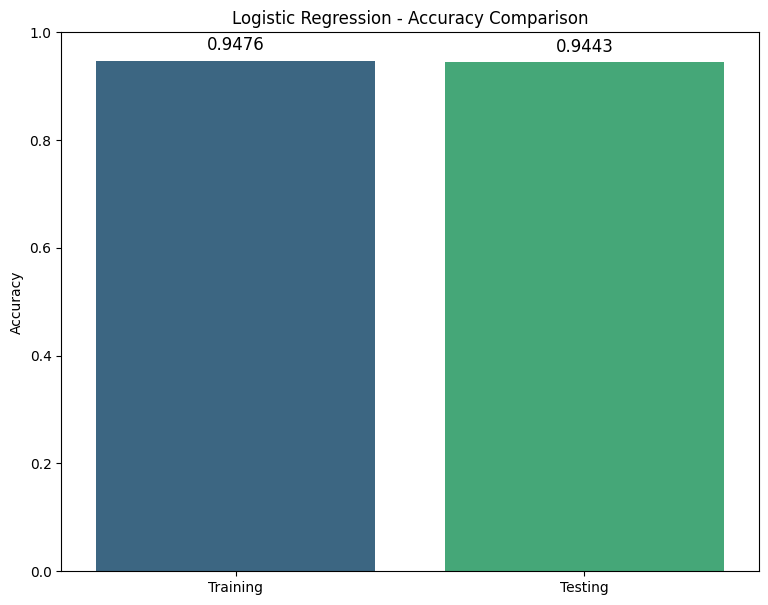

In [ ]:
def plot_accuracy(model_name, train_accuracy, test_accuracy):
    plt.figure(figsize=(9,7))

    sns.barplot(
        x=['Training', 'Testing'],
        y=[train_accuracy, test_accuracy],
        hue=['Training', 'Testing'],
        palette='viridis',
        legend=False
    )

    plt.title(f"{model_name} - Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)

    # Show values
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

    plt.show()

plot_accuracy("Logistic Regression", train_acc_logreg, test_acc_logreg)

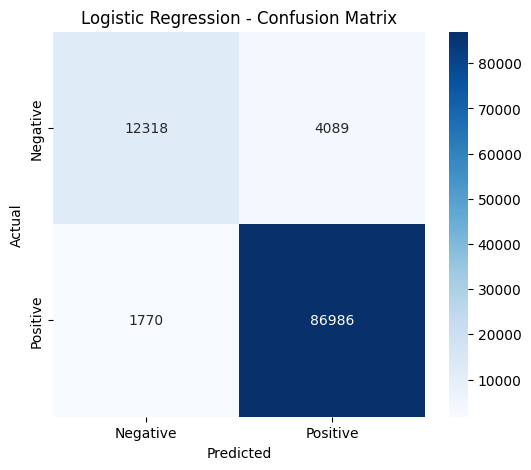

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Negative', 'Positive'],
        yticklabels=['Negative', 'Positive']
    )

    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix("Logistic Regression", y_test, y_pred_test_logreg)

## USER PREDICTION USING LOGISTIC MODEL

In [ ]:
 # Get indices that belong to the test set
test_indices_lr = df.index[df.index.isin(X_test.indices)]

def predict_review_logistic(index):
    review = df.loc[index, 'Review']
    cleaned = clean_text(review)
    vectorized = vectorizer.transform([cleaned])
    pred = log_model.predict(vectorized)[0]

    print(f"Prediction for Sample Index: {index}")

    print("Predicted Sentiment :", "Positive" if pred == 1 else "Negative")
    print("Actual Sentiment    :", "Positive" if df.loc[index, 'Sentiment'] == 1 else "Negative")

    print("\nReview Text:\n")
    print(review)

# TAKE USER INPUT

sample_index = int(input(
    f"\nEnter a sample index to predict: ({min(test_indices_lr)} to {max(test_indices_lr)}): "
))

predict_review_logistic(sample_index)


Enter a sample index to predict: (0 to 4999): 400
Prediction for Sample Index: 400
Predicted Sentiment : Positive
Actual Sentiment    : Positive

Review Text:

I love these chips.  They are thick and crunchy! These chips are thick and crunchy.  I absolutely love them.  The taste is perfect.  I like to buy these smaller bags because I cant trust myself with a large bag of these because they taste no good.


# Linear SVM

### Finds the optimal boundary between TF-IDF word patterns of positive and negative reviews.Classifies sentiment by maximizing the separation between the two classes using support vectors.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Create the model
svm_model = LinearSVC()

# Train
svm_model.fit(X_train, y_train)

# Predictions
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Accuracies
train_acc_svm = accuracy_score(y_train, y_pred_train_svm)
test_acc_svm = accuracy_score(y_test, y_pred_test_svm)

print(f"Training Accuracy: {train_acc_svm:.4f}")
print(f"Testing Accuracy:  {test_acc_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_svm))

Training Accuracy: 0.9506
Testing Accuracy:  0.9462

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82     16407
         1.0       0.96      0.98      0.97     88756

    accuracy                           0.95    105163
   macro avg       0.91      0.88      0.89    105163
weighted avg       0.94      0.95      0.95    105163



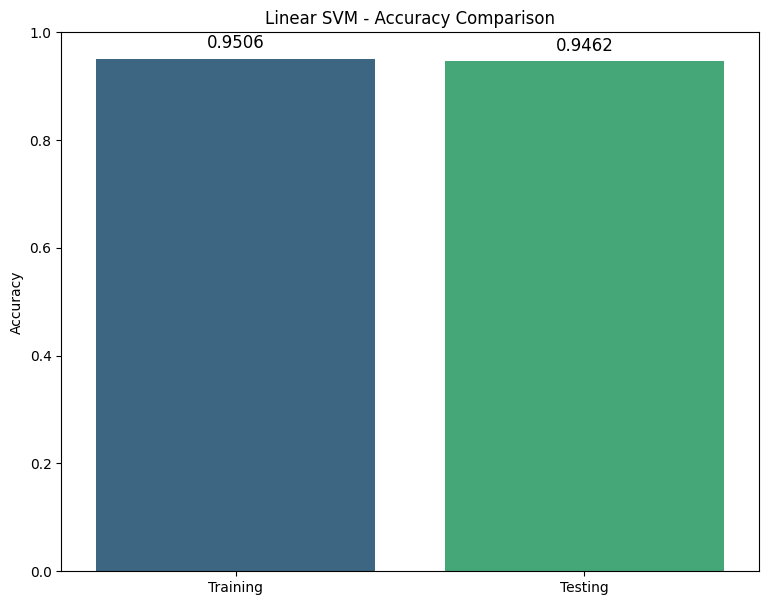

In [ ]:
plot_accuracy("Linear SVM", train_acc_svm, test_acc_svm)

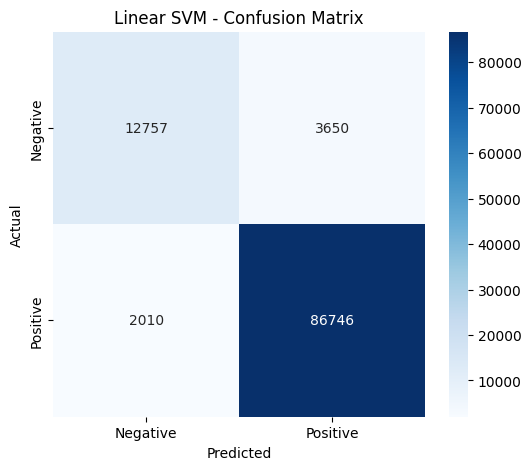

In [ ]:
plot_confusion_matrix("Linear SVM", y_test, y_pred_test_svm)

## USER PREDICTION USING LINEAR SVM

In [ ]:
# Get indices that belong to the test set
test_indices_svm = df.index[df.index.isin(X_test.indices)]

def predict_review_svm(index):
    review = df.loc[index, 'Review']
    cleaned = clean_text(review)
    vectorized = vectorizer.transform([cleaned])
    pred = svm_model.predict(vectorized)[0]

    print(f"\nPrediction for Sample Index: {index}")
    print("---------------------------------")
    print("Predicted Sentiment :", "Positive" if pred == 1 else "Negative")
    print("Actual Sentiment    :", "Positive" if df.loc[index, 'Sentiment'] == 1 else "Negative")

    print("\nReview Text:\n")
    print(review)

# USER INPUT
sample_index = int(input(
    f"\nEnter a sample index to predict (Range {min(test_indices_svm)} to {max(test_indices_svm)}): "
))

predict_review_svm(sample_index)



Enter a sample index to predict (Range 0 to 4999): 799

Prediction for Sample Index: 799
---------------------------------
Predicted Sentiment : Positive
Actual Sentiment    : Positive

Review Text:

Delicious Everyone in our family except one really likes the taste of this.  It is addicting.  That includes our 3 year old.


# Multinomial Naive Bayes

### Assumes that review words occur independently and calculates probabilities for Positive or Negative sentiment using word frequencies.Predicts sentiment based on the highest probability derived from the distribution of words in the review.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create the model
nb_model = MultinomialNB()

# Train
nb_model.fit(X_train, y_train)

# Predictions
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

# Accuracies
train_acc_nb = accuracy_score(y_train, y_pred_train_nb)
test_acc_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {train_acc_nb:.4f}")
print(f"Testing Accuracy:  {test_acc_nb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_nb))

Training Accuracy: 0.9027
Testing Accuracy:  0.9013

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.41      0.56     16407
         1.0       0.90      0.99      0.94     88756

    accuracy                           0.90    105163
   macro avg       0.91      0.70      0.75    105163
weighted avg       0.90      0.90      0.88    105163



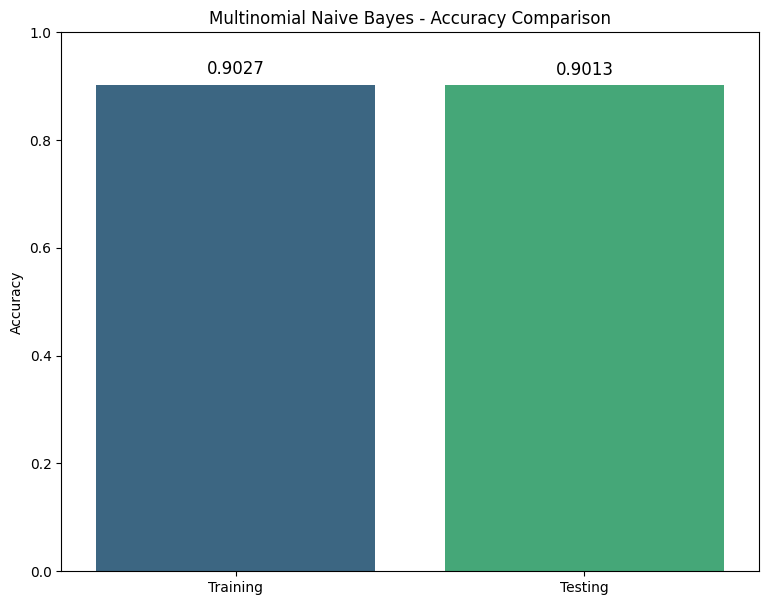

In [ ]:
plot_accuracy("Multinomial Naive Bayes", train_acc_nb, test_acc_nb)

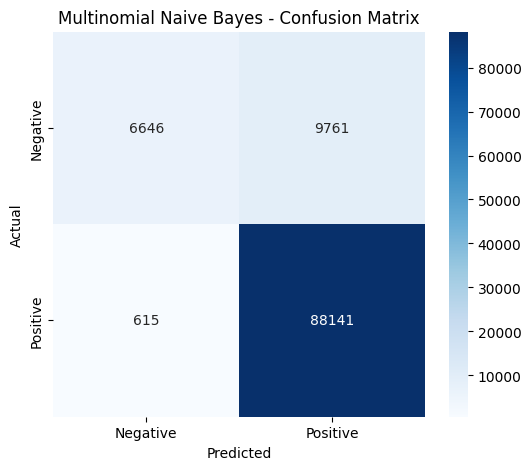

In [ ]:
plot_confusion_matrix("Multinomial Naive Bayes", y_test, y_pred_test_nb)

# USER PREDICTION USING MULTINOMIAL NAIVE BAYES

In [ ]:
# Get test indices
test_indices_nb = df.index[df.index.isin(X_test.indices)]

def predict_review_nb(index):
    review = df.loc[index, 'Review']
    cleaned = clean_text(review)
    vectorized = vectorizer.transform([cleaned])
    pred = nb_model.predict(vectorized)[0]

    print(f"\nPrediction for Sample Index: {index}")
    print("---------------------------------")
    print("Predicted Sentiment :", "Positive" if pred == 1 else "Negative")
    print("Actual Sentiment    :", "Positive" if df.loc[index, 'Sentiment'] == 1 else "Negative")

    print("\nReview Text:\n")
    print(review)

# USER INPUT
sample_index = int(input(
    f"\nEnter a sample index to predict (Range {min(test_indices_nb)} to {max(test_indices_nb)}): "
))

predict_review_nb(sample_index)


Enter a sample index to predict (Range 0 to 4999): 17

Prediction for Sample Index: 17
---------------------------------
Predicted Sentiment : Positive
Actual Sentiment    : Positive

Review Text:

Love it! I am very satisfied with my Twizzler purchase.  I shared these with others and we have all enjoyed them.  I will definitely be ordering more.


# Performance Evaluation of Three Machine Learning Models for Sentiment Classification

In [ ]:
model_names = ["Logistic Regression", "Linear SVM", "Multinomial Naive Bayes"]

train_accuracies = [
    train_acc_logreg,
    train_acc_svm,
    train_acc_nb
]

test_accuracies = [
    test_acc_logreg,
    test_acc_svm,
    test_acc_nb
]

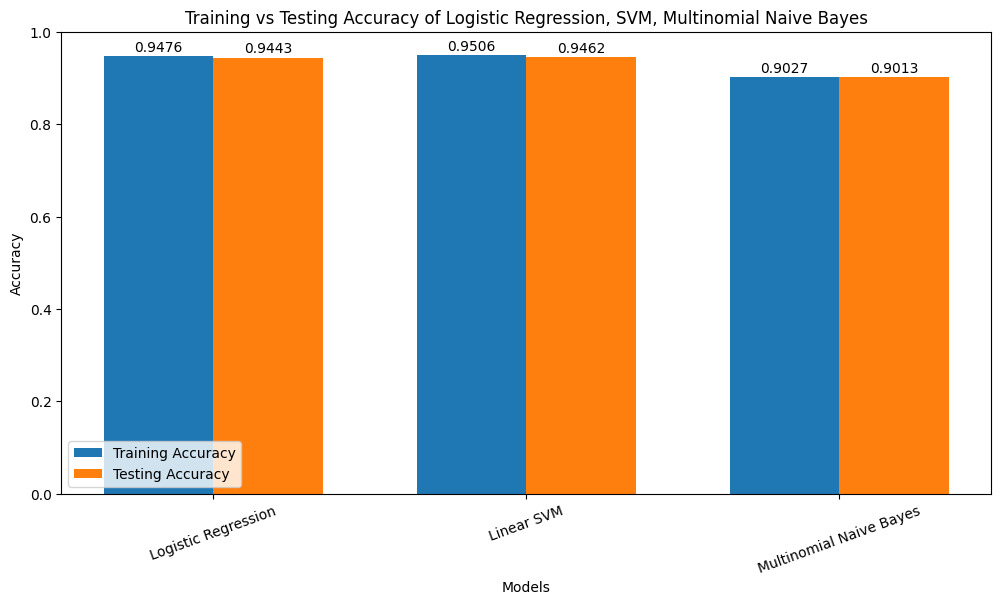

In [ ]:
plt.figure(figsize=(12,6))

x_axis = np.arange(len(model_names))
bar_width = 0.35

plt.bar(x_axis - bar_width/2, train_accuracies, width=bar_width, label="Training Accuracy")
plt.bar(x_axis + bar_width/2, test_accuracies,  width=bar_width, label="Testing Accuracy")

plt.title("Training vs Testing Accuracy of Logistic Regression, SVM, Multinomial Naive Bayes")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(x_axis, model_names, rotation=20)
plt.ylim(0, 1)
plt.legend()

# Add accuracy values above bars
for i, v in enumerate(train_accuracies):
    plt.text(i - bar_width/2, v + 0.01, f"{v:.4f}", ha='center')

for i, v in enumerate(test_accuracies):
    plt.text(i + bar_width/2, v + 0.01, f"{v:.4f}", ha='center')

plt.show()

# FOOD REVIEW SENTIMENT CLASSIFIER USING MACHINE LEARNING

FOOD REVIEW SENTIMENT CLASSIFIER 
Available Models:
1) Logistic Regression
2) Linear SVM
3) Naive Bayes

Enter your model name: Linear SVM

Training Linear SVM...

Linear SVM - Training Accuracy: 0.9506
Linear SVM - Testing Accuracy:  0.9462

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82     16407
         1.0       0.96      0.98      0.97     88756

    accuracy                           0.95    105163
   macro avg       0.91      0.88      0.89    105163
weighted avg       0.94      0.95      0.95    105163



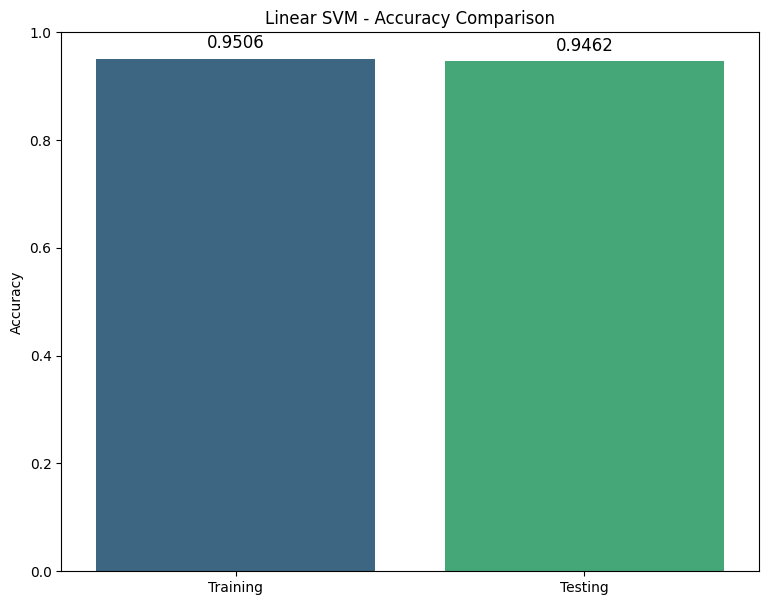

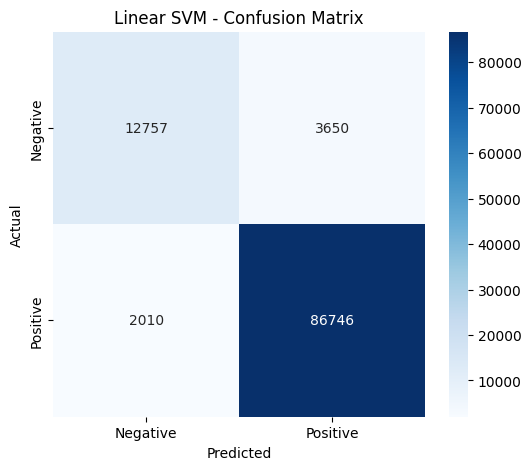


Enter the test set index you want to predict (0 to 4999): 999
Prediction for Test Index: 999
Predicted Sentiment : Positive
Actual Sentiment    : Positive

Review Text:

Excellent This is the real deal. Genmai Cha. Loose green tea and roasted brown rice. Not in bags. Originally known as the "Peoples Tea" for those who couldn't afford better. Very popular because of its mild flavor. You can drink it all day long (like I do). You won't be disappointed.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_and_evaluate(model_name):
    # Select Model
    if model_name == "Logistic Regression":
        model = LogisticRegression(max_iter=4000)
    elif model_name == "Linear SVM":
        model = LinearSVC()
    elif model_name == "Naive Bayes":
        model = MultinomialNB()
    else:
        print("Invalid model name. Choose Logistic Regression, Linear SVM, or Naive Bayes.")
        return None

    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)

    print(f"\n{model_name} - Training Accuracy: {train_acc:.4f}")
    print(f"{model_name} - Testing Accuracy:  {test_acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

    # Plots
    plot_accuracy(model_name, train_acc, test_acc)
    plot_confusion_matrix(model_name, y_test, y_pred_test)

    return model

# USER PREDICTION FUNCTION (TEST INDEX)
test_indices_sa = df.index[df.index.isin(X_test.indices)]

def predict_review_by_test_index(test_index, model_name, model):
    """
    Predict sentiment for a given test set review index.
    """

    if test_index not in test_indices_sa:
        print("Invalid index! Choose an index from the test set.")
        return

    review_text = df.loc[test_index, "Review"]
    true_label  = df.loc[test_index, "Sentiment"]

    cleaned = clean_text(review_text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)[0]

    print(f"Prediction for Test Index: {test_index}")
    print("Predicted Sentiment :", "Positive" if pred == 1 else "Negative")
    print("Actual Sentiment    :", "Positive" if true_label == 1 else "Negative")
    print("\nReview Text:\n")
    print(review_text)


# MAIN FUNCTION (MENU SYSTEM)
def main():
    print("FOOD REVIEW SENTIMENT CLASSIFIER ")

    print("Available Models:")
    print("1) Logistic Regression")
    print("2) Linear SVM")
    print("3) Naive Bayes\n")

    model_name = input("Enter your model name: ").strip()

    model = train_and_evaluate(model_name)

    if model is not None:
        while True:
            try:
                test_index = int(input(
                    f"\nEnter the test set index you want to predict ({min(test_indices_sa)} to {max(test_indices_sa)}): "
                ))
                predict_review_by_test_index(test_index, model_name, model)
                break
            except ValueError:
                print("Invalid input! Please enter a valid integer.")

main()

# DEEP LEARNING

## Importing necesary libraries

In [ ]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, SpatialDropout1D, Bidirectional,
    LSTM, GRU, Dense, Dropout, Conv1D, GlobalMaxPooling1D,
    Concatenate, Layer
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Splitting, Tokenization, and Sequence Preparation for Deep Learning Models

In [ ]:
# Stratified splits (keep original df indices) + tokenizer + padding
from sklearn.model_selection import train_test_split

# Ensure df['CleanText'] and df['Sentiment']
texts_all = df['CleanText'].astype(str).values
labels_all = df['Sentiment'].astype(int).values
indices = df.index.values

# Split: train 70%, val 15%, test 15%
idx_temp, idx_test, y_temp, y_test = train_test_split(indices, labels_all, test_size=0.15, stratify=labels_all, random_state=42)
idx_train, idx_val, y_train_tmp, y_val_tmp = train_test_split(idx_temp, y_temp, test_size=0.1764706, stratify=y_temp, random_state=42)

# Build text arrays using original df indices
X_train_texts = df.loc[idx_train, 'CleanText'].astype(str).values
X_val_texts   = df.loc[idx_val,   'CleanText'].astype(str).values
X_test_texts  = df.loc[idx_test,  'CleanText'].astype(str).values

y_train = df.loc[idx_train, 'Sentiment'].astype(int).values
y_val   = df.loc[idx_val,   'Sentiment'].astype(int).values
y_test  = df.loc[idx_test,  'Sentiment'].astype(int).values

print("Train sizes:", len(X_train_texts))
print("Val:" ,len(X_val_texts))
print("Test sizes:" ,len(X_test_texts))

# Tokenizer + padding parameters
max_words = 30000
max_len = 100
embedding_dim = 50

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

def texts_to_padded(texts_list):
    seq = tokenizer.texts_to_sequences(texts_list)
    return pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

# create padded arrays used by models
X_train = texts_to_padded(X_train_texts)
X_val   = texts_to_padded(X_val_texts)
X_test  = texts_to_padded(X_test_texts)

vocab_size = min(max_words, len(tokenizer.word_index) + 1)
print("Vocab size used:", vocab_size)
print("Shapes:", X_train.shape, X_val.shape, X_test.shape)


Train sizes: 368069
Val: 78872
Test sizes: 78873
Vocab size used: 30000
Shapes: (368069, 100) (78872, 100) (78873, 100)


#BiLSTM (Bidirectional Long Short-Term Memory)
### Learns sentiment by reading the review forward and backward, capturing long-range context and word dependencies in the sentence.
### Predicts sentiment based on the overall meaning learned from sequential patterns in the text.

In [ ]:
# ===  Define the BiLSTM builder  ===
def build_fast_bilstm(vocab_size, embedding_dim=50, max_len=100):
    inp = Input(shape=(max_len,))
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inp)
    x = SpatialDropout1D(0.1)(x)
    x = Bidirectional(LSTM(64, return_sequences=False, dropout=0.2))(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# ===  Build and show model summary ===
bi_lstm = build_fast_bilstm(vocab_size, embedding_dim=embedding_dim, max_len=max_len)
bi_lstm.summary()

# === Train: limited steps/epoch for speed ===
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

hist_bi = bi_lstm.fit(
    train_dataset,
    validation_data=(X_val, y_val),
    epochs=1,
    steps_per_epoch=50,
    callbacks=[es],
    verbose=1
)

# === 6) Evaluate & print results ===
from sklearn.metrics import accuracy_score
y_pred_test = (bi_lstm.predict(X_test, batch_size=512) > 0.5).astype(int).reshape(-1)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"\nBiLSTM Test Accuracy (full X_test): {test_acc:.4f}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 50)        │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 100, 50)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        58,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,563,041 (5.96 MB)

 Trainable params: 1,563,041 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8245 - loss: 0.5285 - val_accuracy: 0.8440 - val_loss: 0.3437
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step

BiLSTM Test Accuracy (full X_test): 0.8440


# TextCNN (Convolutional Neural Network for Text)

### Uses convolutional filters to detect important n-gram phrases (e.g., “not good”, “highly recommend”) and pools the strongest features.

### Predicts sentiment by feeding these pooled features into dense layers and outputting a probability for Positive/Negative sentiment.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build TextCNN
def build_fast_textcnn(vocab_size, embedding_dim=50, max_len=100):
    inp = Input(shape=(max_len,))
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inp)
    x = SpatialDropout1D(0.1)(x)
    convs = []
    for k in [3,4]:
        c = Conv1D(filters=64, kernel_size=k, activation='relu')(x)
        c = GlobalMaxPooling1D()(c)
        convs.append(c)
    x = Concatenate()(convs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create tf.data pipeline on the SUBSET used earlier (X_train_sub, y_train_sub)
batch_size = 128
train_dataset_cnn = tf.data.Dataset.from_tensor_slices((X_train_sub, y_train_sub))
train_dataset_cnn = train_dataset_cnn.shuffle(20000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Build model
text_cnn = build_fast_textcnn(vocab_size, embedding_dim=50, max_len=max_len)
text_cnn.summary()

# Train with limited steps per epoch
es_cnn = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

hist_cnn = text_cnn.fit(
    train_dataset_cnn,
    validation_data=(X_val, y_val),
    epochs=2,
    steps_per_epoch=50,
    callbacks=[es_cnn],
    verbose=1
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 100, 50)   │  1,500,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_2 │ (None, 100, 50)   │          0 │ embedding_2[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 98, 64)    │      9,664 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 97, 64)    │     12,864 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      4,128 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         33 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,526,689 (5.82 MB)

 Trainable params: 1,526,689 (5.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - accuracy: 0.8495 - loss: 0.4921 - val_accuracy: 0.8440 - val_loss: 0.4167
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - accuracy: 0.8529 - loss: 0.4006 - val_accuracy: 0.8440 - val_loss: 0.3632


## Predict by test-set dataframe index

In [ ]:
 from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_by_test_index_dl(model, df_index, model_name="Deep Model"):
    # Check if the index belongs to test set
    if df_index not in idx_test:
        print(f"Index {df_index} is NOT in the test set. Pick one from idx_test.")
        return

    # Extract review + actual label
    review_raw = df.loc[df_index, "Review"]
    actual = df.loc[df_index, "Sentiment"]

    # Clean → tokenize → pad
    cleaned = clean_text(review_raw)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict
    prob = float(model.predict(padded)[0][0])
    pred = 1 if prob > 0.5 else 0

    # Output (your exact SVM-style format)
    print(f"\nPrediction for Test Index: {df_index}")
    print(f"Predicted Sentiment : {'Positive' if pred==1 else 'Negative'}")
    print(f"Actual Sentiment    : {'Positive' if actual==1 else 'Negative'}")
    print(f"\nPrediction Score    : {prob:.4f}")
    print("\nReview Text:\n")
    print(review_raw)

In [ ]:
#  Show first few test indices for user to choose
print("Example test indices from the test set:", idx_test[:20])

Example test indices from the test set: [468137 202140 495361 222236 140116 459542 494870 368982  18603 495816
 382639 451700 222977  36137 387996 504687 426794 119000 221758  96771]


# USER PREDICTION USING BiLSTM MODEL



In [ ]:
# User prediction using BiLSTM

index_to_test = int(input("\nEnter a test-set index to predict using BiLSTM: "))
predict_by_test_index_dl(bi_lstm, index_to_test, "BiLSTM Model")


Enter a test-set index to predict using BiLSTM: 468137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Prediction for Test Index: 468137
Predicted Sentiment : Positive
Actual Sentiment    : Positive

Prediction Score    : 0.8334

Review Text:

Excellent All The Way Around The product was wonderful, and priced very well. The shipping was two days from California, I live in Virginia. The product was packed with cooler packs for a nominal shipping price. I have already ordered other products from this company. Great experience.


# USER PREDICTION USING TextCNN MODEL

In [ ]:
# User prediction using TextCNN

index_to_test = int(input("\nEnter a test-set index to predict using TextCNN: "))
predict_by_test_index_dl(text_cnn, index_to_test, "TextCNN Model")


Enter a test-set index to predict using TextCNN: 36137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Prediction for Test Index: 36137
Predicted Sentiment : Positive
Actual Sentiment    : Positive

Prediction Score    : 0.9504

Review Text:

See the guy on the label? He aint lying.<br /><br />Oh man, this stuff is so good and so breathtakingly and peacefully hot at the same time its unbelievable. Very thick, use sparingly or just slather it on and take your punishment. It has a great tart/sweet flavor that shows through the habanero. Good stuff.


## FOOD REVIEW SENTIMENT CLASSIFIER — DEEP LEARNING MODELS

In [ ]:
def dl_menu_simple():
    print("\nFOOD REVIEW SENTIMENT CLASSIFIER — DEEP LEARNING MODELS\n")
    print("Available Models:")
    print("1) BiLSTM")
    print("2) TextCNN")
    print("3) Exit\n")

    choice = input("Enter model number or name: ").strip().lower()

    # Mapping user input
    if choice in ["1", "bilstm"]:
        model_choice = "BiLSTM"
    elif choice in ["2", "textcnn"]:
        model_choice = "TextCNN"
    elif choice in ["3", "exit"]:
        print("Exiting menu.")
        return
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")
        return

    # Show some test indices for convenience
    print("\nExample test indices:", idx_test[:10].tolist())

    # Ask for index
    while True:
        try:
            test_index = int(input("\nEnter test set index to predict: "))
            if test_index not in idx_test:
                print("Index not in test set. Choose one shown above.")
                continue
            break
        except:
            print("Enter a valid integer.")

    # Run the correct model
    if model_choice == "BiLSTM":
        print("\n--- Using BiLSTM ---")
        predict_by_test_index_dl(bi_lstm, test_index, "BiLSTM Model")

    elif model_choice == "TextCNN":
        print("\n--- Using TextCNN ---")
        predict_by_test_index_dl(text_cnn, test_index, "TextCNN Model")


# Run menu
dl_menu_simple()


FOOD REVIEW SENTIMENT CLASSIFIER — DEEP LEARNING MODELS

Available Models:
1) BiLSTM
2) TextCNN
3) Exit

Enter model number or name: 1

Example test indices: [468137, 202140, 495361, 222236, 140116, 459542, 494870, 368982, 18603, 495816]

Enter test set index to predict: 202140

--- Using BiLSTM ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Prediction for Test Index: 202140
Predicted Sentiment : Positive
Actual Sentiment    : Positive

Prediction Score    : 0.9108

Review Text:

Good cookies and a fun wrapper These biscuits are very good with red wine. The wrapper can also be used for a party trick. See the video link.<br /><br />[...]<br /><br />Or search on YouTube for roman candle big night
